# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plt.style.use('seaborn')

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def rolling(n):
    rolls = []
    for i in range(n):
        two_rolling = random.randint(1, 6) + random.randint(1, 6)
        rolls.append(two_rolling)
    return rolls

df=pd.DataFrame({'Result': rolling (10)})
df

,Result
0,6
1,7
2,7
3,11
4,4
5,8
6,4
7,10
8,8
9,11


#### 2.- Plot the results sorted by value.

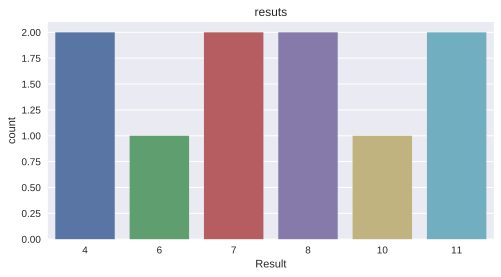

In [3]:
fig = plt.figure(figsize=(8, 4))
ax= sns.countplot(df['Result'])
ax.set(title='resuts')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

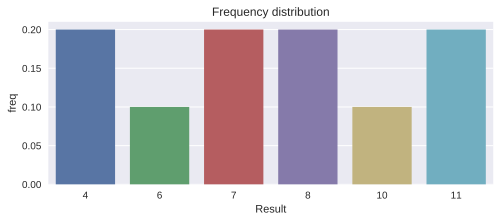

In [4]:
frequency=df.groupby('Result').size().reset_index()
frequency['freq'] = frequency.apply(lambda new: new[0]/sum(frequency[0]), axis=1)

fig = plt.figure(figsize=(8, 3))
ax= sns.barplot(frequency['Result'],frequency['freq'])
ax.set(title='Frequency distribution')
plt.show()

In [5]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean(x):
    return sum(x)/len(x)

mean(df['Result'])

7.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
mean(frequency[0])

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
import math

def quantile(data, quantile):
    size = len(data)
    return sorted(data)[int(math.ceil((size * quantile) / 100)) - 1]


quantile(df['Result'], 50)

7

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
print(quantile(df['Result'], 25))
print(quantile(df['Result'], 50))
print(quantile(df['Result'], 75))



6
7
10


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [10]:
roll_the_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
roll_the_dice_hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


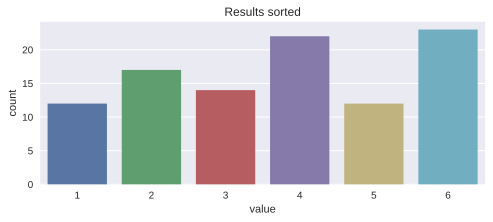

In [11]:
fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(roll_the_dice_hundred['value'])
ax.set(title='Results sorted')
plt.show()

The more tests we do, the results stabilize

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
def mean(x):
    return sum(x)/len(x)

mean(roll_the_dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [13]:
frequency_2=roll_the_dice_hundred.groupby('value').size().reset_index()
frequency_2['freq'] = frequency_2.apply(lambda new: new[0]/sum(frequency_2[0]), axis=1)
frequency_2

,value,0,freq
0,1,12,0.12
1,2,17,0.17
2,3,14,0.14
3,4,22,0.22
4,5,12,0.12
5,6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

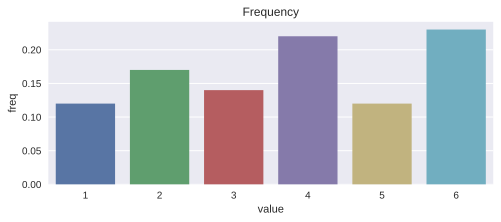

In [14]:
fig = plt.figure(figsize=(8, 3))
ax= sns.barplot(frequency_2['value'],frequency_2['freq'])
ax.set(title='Frequency')
plt.show()

The more tests we do, the results stabilize.the mean is grouped in 3.7

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [15]:
roll_the_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_the_dice_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


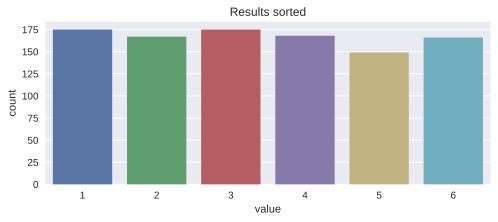

In [16]:
fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(roll_the_dice_thousand['value'])
ax.set(title='Results sorted')
plt.show()

The more times we roll the dice, the closer the results will be to having all 166 counts.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [17]:
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


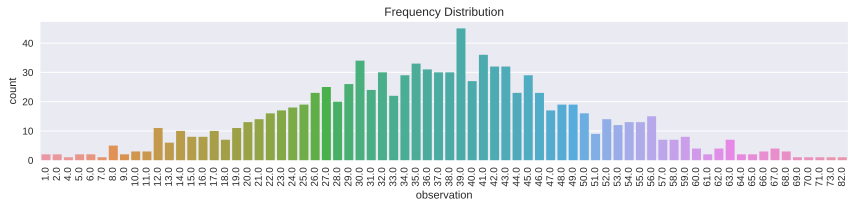

In [18]:
fig = plt.figure(figsize=(12, 3))
ax= sns.countplot(ages_population['observation'])
ax.set(title='Frequency Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
mean = ages_population.mean()
mean

observation    36.56
dtype: float64

In [20]:
std = ages_population.std()
std

observation    12.8165
dtype: float64

The mean is around the highest peaks of the graph

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

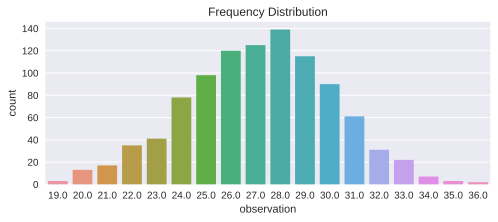

In [21]:
ages_population_2 = pd.read_csv('../data/ages_population2.csv', low_memory=False)

fig = plt.figure(figsize=(8, 3))
ax= sns.countplot(ages_population_2['observation'])
ax.set(title='Frequency Distribution')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Result range is smaller in this graph

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [22]:
mean = ages_population_2.mean()
mean

observation    27.155
dtype: float64

In [23]:
std = ages_population_2.std()
std

observation    2.969814
dtype: float64

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [24]:
ages_population_3 = pd.read_csv('../data/ages_population3.csv')
ages_population_3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


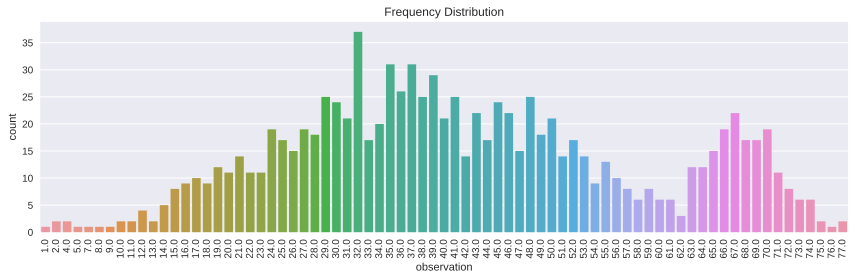

In [25]:
fig = plt.figure(figsize=(12, 4))
ax= sns.countplot(ages_population_3['observation'])
ax.set(title='Frequency Distribution')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
mean = ages_population_3.mean()
mean

observation    41.989
dtype: float64

In [27]:
std = ages_population_3.std()
std

observation    16.144706
dtype: float64

ages_population_3 has a higher standard deviation and also the mean is higher because the second peak is close to the maximum.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
ages_population_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


peak is between the third quartile and the maximum, so the mean and standard deviation are the highest.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:
import numpy as np
a = ages_population_3
p = np.percentile(a, 50) # return 50th percentile, e.g median.
p

40.0

In [36]:
for x in range(0,100,8):
    print(np.percentile(ages_population_3,x))

1.0
20.0
26.0
30.0
33.0
36.0
39.0
43.0
47.0
51.0
57.0
66.0
70.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""